**LIBRERIAS UTILIZADAS**

stringr: paquete desarrollado por Hadley Wickham con multitud de funciones (división, búsqueda, reemplazo…) para trabajar con strings.

tidytext: paquete desarrollado por Julia Silge y David Robinson. Los autores proponen una forma de trabajar con texto que sigue los principios de tidy data, lo que hace muy sencillo combinarlo con otros paquetes tales como dplyr, broom, tidyr y ggplot2.

quanteda: paquete con multitud de funciones orientadas a text mining, algunas de ellas permiten crear Term-Document Matrices

purrr: permite aplicar funciones a elementos de un vector o lista, por ejemplo, a los elementos de una columna de un dataframe.

**DATOS UTILIZADOS **


Elon Musk (@elonmusk) y Bill Gates (@BillGates), dos directivos de empresas tecnológicas.

Mayor Ed Lee (@mayoredlee) alcalde de la ciudad de San Francisco.

 Para el trabajo de análisis que se quiere realizar, es conveniente recuperar tantos tweets como sea posible, o al menos unos 1000. Como el número máximo de tweets recuperados por consulta es de 200 y existe una limitación de tiempo mínimo entre consulta y consulta, se sigue la siguiente estrategia:

Todo tweet tiene un ID global numérico que sigue un orden temporal, lo que permite identificar si un tweet es más reciente que otro.

Entre los argumentos de api.GetUserTimeline() se puede especificar el max_id para recuperar únicamente tweets más antiguos.

Antes de cada consulta, se lee el fichero donde se están almacenando los tweets y se identifica el ID del último tweet recuperado. Si no existe fichero de almacenamiento para el usuario en cuestión, se crea uno.

Se realiza una nueva consulta empleando como argumento max_id el ID recuperado en el paso anterior.

Se incorporar los nuevos datos al archivo de almacenamiento.

In [1]:
#Instalar paquetes(esto solo es necesario la primera vez)
install.packages("twitteR")
install.packages("dplyr")
install.packages("tidyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘rjson’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(twitteR)
library(tidyverse)
library(knitr)


Attaching package: ‘twitteR’


The following objects are masked from ‘package:dplyr’:

    id, location




In [ ]:
# Identificación y obtención de tokens
appname <- "extrac-------eets"
key     <- "WXkVypH-----------------mY0"
secret  <- "EeMD2-------qYbYw5EFTKR7i3M"
twitter_token <-create_token(app = appname, consumer_key = key,  consumer_secret = secret)

ERROR: ignored

In [ ]:
extraccion_tweets <- function(usuario, maxtweets = 100, output_file_name = NULL){
  # Esta función extrae los tweets publicados por un usuario y los almacena en
  # un fichero csv. Si existe un fichero con el mismo nombre, lo lee, concatena
  # los nuevos tweets y lo sobrescribe.
  #
  # Argumentos:
  #   usuario: identificador del usuario de twitter
  #   maxtweets: número de tweets que se recuperan
  #   output_file_name: nombre del fichero de escritura

  # Si no se especifica el nombre del archivo de almacenamiento, se crea un
  # nombre por defecto
  if(is.null(output_file_name)){
        output_file_name <- paste0("datos_tweets_", usuario, ".csv")
  }

  # Si no existe el fichero de almacenamiento, se crea uno nuevo con los
  # resultados de la primera recuperación
  if(!(output_file_name %in% list.files())){
    datos_new <- get_timeline(user = usuario, n = maxtweets, parse = TRUE,
                              check = TRUE, include_rts = FALSE)
    write_csv(x = datos_new, path = output_file_name, col_names = TRUE)
    print("Nuevo fichero creado")
  }else{
    # Se leen los datos antiguos
    datos_old <- read_csv(file = output_file_name)
    # Se identifica el último Id recuperado
    ultimo_id <- tail(datos_old, 1)["status_id"] %>% pull()
    # Para no recuperar de nuevo el último tweet de la consulta anterior
    # se incrementa en 1 el Id
    ultimo_id = ultimo_id + 1
    # Para que no haya errores de compatibilidad, se convierten todas las
    # columnas numéricas a character
    datos_old <- map_if(.x = datos_old, .p = is.numeric, .f = as.character)
    # Extracción de nuevos tweets
    datos_new <- get_timeline(user = usuario, n = maxtweets, max_id = ultimo_id,
                              parse = TRUE, check = TRUE, include_rts = FALSE)
    datos_new <- map_if(.x = datos_new, .p = is.numeric, .f = as.character)
    # Concatenación de los datos nuevos, viejos y escritura en disco
    datos_concatenados <- bind_rows(datos_old, datos_new)
    write_csv(x = datos_concatenados, path = output_file_name, col_names = TRUE)
    print(paste("Número total de tweets:", nrow(datos_concatenados)))
    print(paste("Número de tweets nuevos:", nrow(datos_new)))
  }
}

In [ ]:
tweets_elon<-read_csv(file = "datos_tweets_@elonmusk.csv",col_names = TRUE)
tweets_BillGates<-read_csv(file = "datos_tweets_@BillGates.csv",col_names = TRUE)
tweets_mayoredlee<-read_csv(file = "datos_tweets_@mayoredlee.csv",col_names = TRUE)

# Se unen todos los tweets en un único dataframe
tweets <- bind_rows(tweets_elon, tweets_BillGates, tweets_mayoredlee)

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 2678 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (11): screen_name, text, in_reply_to_status_screen_name, lang, source, ...
dbl   (8): user_id, status_id, retweet_count, favorite_count, quote_status_i...
lgl  (15): is_quote_status, is_retweet, retweet_status_id, urls, symbols, ha...
dttm  (1): created_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2087 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (12): screen_name, text, in_reply_to_status_screen_name, lang, source, ...
dbl   (8): user_id, status_id, retweet_count, favorite_count, quote_status_i...
lgl  (14): is_quote_status, is_retweet, retwee

#carga de datos

In [ ]:
tweets_elon       <- read_csv(file = "datos_tweets_@elonmusk.csv",
                              col_names = TRUE)
tweets_BillGates  <- read_csv(file = "datos_tweets_@BillGates.csv",
                              col_names = TRUE)
tweets_mayoredlee <- read_csv(file = "datos_tweets_@mayoredlee.csv",
                              col_names = TRUE)

# Se unen todos los tweets en un único dataframe
tweets <- bind_rows(tweets_elon, tweets_BillGates, tweets_mayoredlee)

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 2678 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (11): screen_name, text, in_reply_to_status_screen_name, lang, source, ...
dbl   (8): user_id, status_id, retweet_count, favorite_count, quote_status_i...
lgl  (15): is_quote_status, is_retweet, retweet_status_id, urls, symbols, ha...
dttm  (1): created_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2087 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (12): screen_name, text, in_reply_to_status_screen_name, lang, source, ...
dbl   (8): user_id, status_id, retweet_count, favorite_count, quote_status_i...
lgl  (14): is_quote_status, is_retweet, retwee

In [ ]:
tweets %>% group_by(screen_name) %>% summarise(numero_tweets = n())

screen_name,numero_tweets
<chr>,<int>
BillGates,2087
elonmusk,2678
mayoredlee,2447


El número de tweets recuperados es superior a 2000 para todos los usuarios.

De entre toda la información disponible, en este análisis únicamente se emplea: autor del tweet, fecha de publicación, identificador del tweet y contenido.
```


```



In [ ]:
colnames(tweets)

[1] "screen_name"                    "user_id"                       
 [3] "created_at"                     "status_id"                     
 [5] "text"                           "retweet_count"                 
 [7] "favorite_count"                 "is_quote_status"               
 [9] "quote_status_id"                "is_retweet"                    
[11] "retweet_status_id"              "in_reply_to_status_status_id"  
[13] "in_reply_to_status_user_id"     "in_reply_to_status_screen_name"
[15] "lang"                           "source"                        
[17] "media_id"                       "media_url"                     
[19] "media_url_expanded"             "urls"                          
[21] "urls_display"                   "urls_expanded"                 
[23] "mentions_screen_name"           "mentions_user_id"              
[25] "symbols"                        "hashtags"                      
[27] "coordinates"                    "place_id"                      
[29] "place_type"                     "place_name"                    
[31] "place_full_name"                "country_code"                  
[33] "country"                        "bounding_box_coordinates"      
[35] "bounding_box_type"

In [ ]:
# Selección de variables
tweets <- tweets %>% select(screen_name, created_at, status_id, text)

# Se renombran las variables con nombres más prácticos
tweets <- tweets %>% rename(autor = screen_name, fecha = created_at,
                            texto = text, tweet_id = status_id)
head(tweets)

autor,fecha,tweet_id,texto
<chr>,<dttm>,<dbl>,<chr>
elonmusk,2017-11-09 17:28:57,9.286758e+17,"""If one day, my words are against science, choose science."" Mustafa Kemal Atatürk"
elonmusk,2017-11-09 17:12:46,9.286717e+17,I placed the flowers Three broken ribs A pierced lung And still he fought For peace at… https://t.co/MeEKf2ZntM
elonmusk,2017-11-08 18:55:13,9.283351e+17,Atatürk Anıtkabir https://t.co/al3wt0njr6
elonmusk,2017-11-07 19:48:45,9.279862e+17,"@Bob_Richards One rocket, slightly toasted"
elonmusk,2017-10-28 21:36:18,9.243894e+17,@uncover007 500 ft so far. Should be 2 miles long in three or four months and hopefully stretch the whole 405 N-S c… https://t.co/BfoqYKJg3u
elonmusk,2017-10-28 21:30:41,9.243880e+17,Picture of The Boring Company LA tunnel taken yesterday https://t.co/TfdVKyXFsJ


## Limpieza de texto y tokenización

El proceso de limpieza de texto, dentro del ámbito de text mining, consiste en eliminar del texto todo aquello que no aporte información sobre su temática, estructura o contenido. No existe una única forma de hacerlo, depende en gran medida de la finalidad del análisis y de la fuente de la que proceda el texto. Por ejemplo, en las redes sociales los usuarios pueden escribir de la forma que quieran, lo que suele resultar en un uso elevado de abreviaturas y signos de puntuación. En este ejercicio, dado que los principales objetivos son estudiar el perfil lingüístico de los tres usuarios, identificar la autoría de los tweets y analizar el sentimiento que transmiten, se procede a eliminar:

Patrones no informativos (urls de páginas web)

Signos de puntuación

Etiquetas HTML

Caracteres sueltos

Números

     Tokenizar un texto consiste en dividir el texto en las unidades que lo conforman, entendiendo por unidad el elemento más sencillo con significado propio para el análisis en cuestión, en este caso, las palabras.

     Existen múltiples librerías que automatizan en gran medida la limpieza y tokenización de texto, por ejemplo, tokenizers o quanteda. Sin embargo, creo que se entiende mejor el proceso implemento una función propia que, si bien puede estar menos optimizada, es más transparente. Definir una función que contenga cada uno de los pasos de limpieza tiene la ventaja de poder adaptarse fácilmente dependiendo del tipo de texto analizado.

In [ ]:
limpiar_tokenizar <- function(texto){
  # El orden de la limpieza no es arbitrario
    # Se convierte todo el texto a minúsculas
    nuevo_texto <- tolower(texto)
    # Eliminación de páginas web (palabras que empiezan por "http." seguidas
    # de cualquier cosa que no sea un espacio)
    nuevo_texto <- str_replace_all(nuevo_texto,"http\\S*", "")
    # Eliminación de signos de puntuación
    nuevo_texto <- str_replace_all(nuevo_texto,"[[:punct:]]", " ")
    # Eliminación de números
    nuevo_texto <- str_replace_all(nuevo_texto,"[[:digit:]]", " ")
    # Eliminación de espacios en blanco múltiples
    nuevo_texto <- str_replace_all(nuevo_texto,"[\\s]+", " ")
    # Tokenización por palabras individuales
    nuevo_texto <- str_split(nuevo_texto, " ")[[1]]
    # Eliminación de tokens con una longitud < 2
    nuevo_texto <- keep(.x = nuevo_texto, .p = function(x){str_length(x) > 1})
    return(nuevo_texto)
}

test = "Esto es 1 ejemplo de l'limpieza de6 TEXTO  https://t.co/rnHPgyhx4Z @JoaquinAmatRodrigo #textmining"
limpiar_tokenizar(texto = test)

[1] "esto"               "es"                 "ejemplo"           
[4] "de"                 "limpieza"           "de"                
[7] "texto"              "joaquinamatrodrigo" "textmining"

Puede observarse que la función limpiar_tokenizar() elimina el símbolo @ y # de las palabra a las que acompañan. En Twitter, los usuarios se identifican de esta forma, por lo que @ y # pertenecen al nombre. Aunque es importante tener en cuenta las eliminaciones del proceso de limpieza, el impacto en este caso no es demasiado alto, ya que, si un documento se caracteriza por tener la palabra #datascience, también será detectado fácilmente mediante la palabra datascience.

In [ ]:
# Se aplica la función de limpieza y tokenización a cada tweet
tweets <- tweets %>% mutate(texto_tokenizado = map(.x = texto,
                                                   .f = limpiar_tokenizar))
tweets %>% select(texto_tokenizado) %>% head()

texto_tokenizado
<list>
"if , one , day , my , words , are , against, science, choose , science, mustafa, kemal , atatürk"
"placed , the , flowers, three , broken , ribs , pierced, lung , and , still , he , fought , for , peace , at"
"atatürk , anıtkabir"
"bob , richards, one , rocket , slightly, toasted"
"uncover , ft , so , far , should , be , miles , long , in , three , or , four , months , and , hopefully, stretch , the , whole"
"picture , of , the , boring , company , la , tunnel , taken , yesterday"


Gracias a la característica de las tibble de poder contener cualquier tipo de elemento en sus columnas (siempre que sea el mismo para toda la columna), se puede almacenar el texto tokenizado. Cada elemento de la columna texto_tokenizado es una lista con un vector de tipo character que contiene los tokens generados.

In [ ]:
tweets %>% slice(1) %>% select(texto_tokenizado) %>% pull()

[[1]]
 [1] "if"      "one"     "day"     "my"      "words"   "are"     "against"
 [8] "science" "choose"  "science" "mustafa" "kemal"   "atatürk"

# Análisis exploratorio

En R, las estructuras por excelencia para el análisis exploratorio son el DataFrame y la Tibble, que es la forma en la que se encuentra almacenada ahora la información de los tweets. Sin embargo, al realizar la tokenización, ha habido un cambio importante. Previamente a la división del texto, los elementos de estudio (observaciones) eran los tweets, y cada uno se encontraba en una fila, cumplimento así la condición de tidy data: una observación, una fila. Al realizar la tokenización, el elemento de estudio ha pasado a ser cada token (palabra), incumpliendo así la condición de tidy data. Para volver de nuevo a la estructura ideal se tiene que expandir cada lista de tokens, duplicando el valor de las otras columnas tantas veces como sea necesario. Ha este proceso se le conoce como expansión o unnest.

In [ ]:
tweets_tidy <- tweets %>% select(-texto) %>% unnest()
tweets_tidy <- tweets_tidy %>% rename(token = texto_tokenizado)
head(tweets_tidy)

Warning message:
“`cols` is now required when using `unnest()`.
ℹ Please use `cols = c(texto_tokenizado)`.”


autor,fecha,tweet_id,token
<chr>,<dttm>,<dbl>,<chr>
elonmusk,2017-11-09 17:28:57,9.286758e+17,if
elonmusk,2017-11-09 17:28:57,9.286758e+17,one
elonmusk,2017-11-09 17:28:57,9.286758e+17,day
elonmusk,2017-11-09 17:28:57,9.286758e+17,my
elonmusk,2017-11-09 17:28:57,9.286758e+17,words
elonmusk,2017-11-09 17:28:57,9.286758e+17,are


Ahora que los la información está en formato tidy, se pueden realizar filtrados, sumatorios y representaciones con gran facilidad.

La función unnest_tokens() del paquete tidytext permite, entre otras cosas, automatizar el proceso tokenización y almacenamiento en formato tidy en un único paso.

# Distribución temporal de los tweets

Dado que cada usuario puede haber iniciado su actividad en Twitter en diferente momento, es interesante explorar si los tweets recuperados solapan en el tiempo.


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




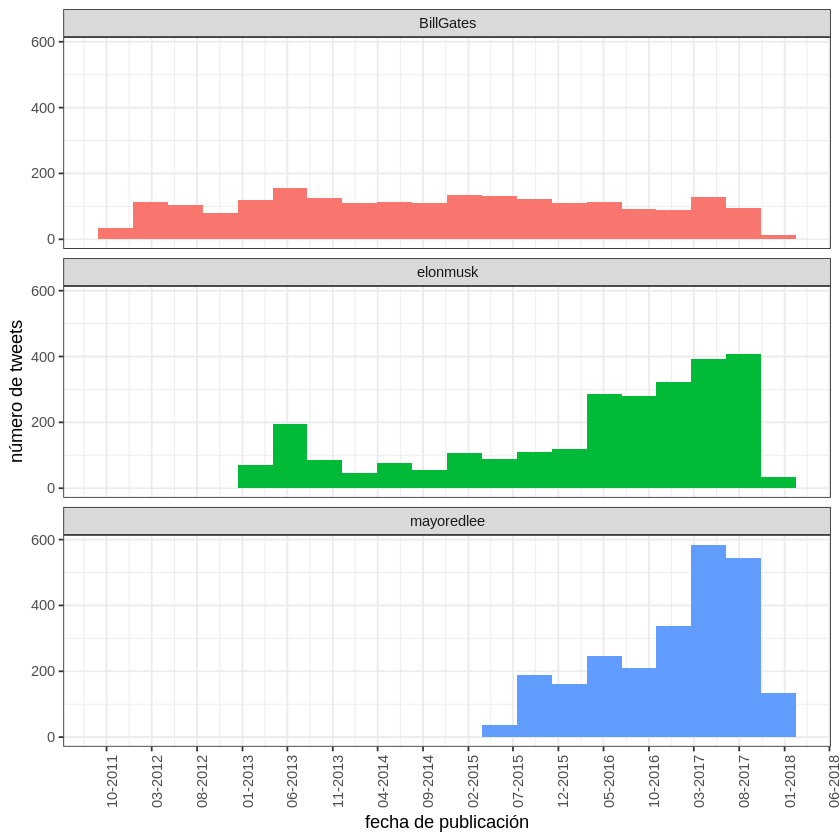

In [ ]:
library(lubridate)

ggplot(tweets, aes(x = as.Date(fecha), fill = autor)) +
  geom_histogram(position = "identity", bins = 20, show.legend = FALSE) +
  scale_x_date(date_labels = "%m-%Y", date_breaks = "5 month") +
  labs(x = "fecha de publicación", y = "número de tweets") +
  facet_wrap(~ autor, ncol = 1) +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90))

`summarise()` has grouped output by 'autor'. You can override using the
`.groups` argument.


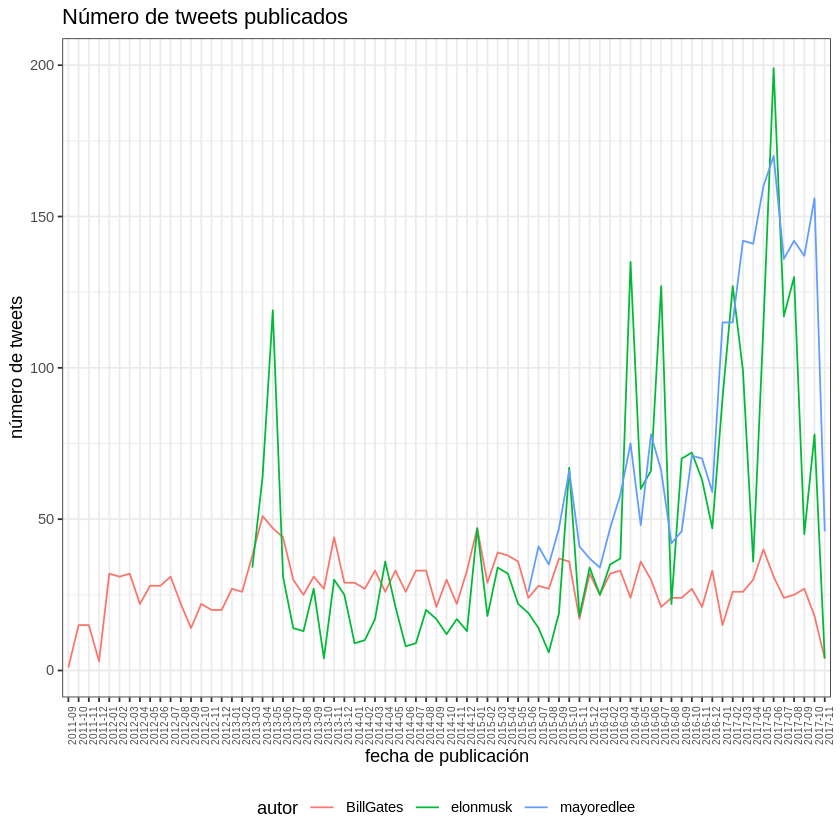

In [ ]:
tweets_mes_anyo <- tweets %>% mutate(mes_anyo = format(fecha, "%Y-%m"))
tweets_mes_anyo %>% group_by(autor, mes_anyo) %>% summarise(n = n()) %>%
  ggplot(aes(x = mes_anyo, y = n, color = autor)) +
  geom_line(aes(group = autor)) +
  labs(title = "Número de tweets publicados", x = "fecha de publicación",
       y = "número de tweets") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, size = 6),
        legend.position = "bottom")

Puede observarse un perfil de actividad distinto para cada usuario. Bill Gates ha mantenido una actividad constante de en torno a 30 tweets por mes durante todo el periodo estudiado. Elon Musk muestra una actividad inicial por debajo de la de Bill Gates pero, a partir de febrero de 2016 incrementó sustancialmente el número de tweets publicados. Ed Lee tiene una actividad muy alta sobre todo en el periodo 2017. Debido a las limitaciones que impone Twitter en las recuperaciones, cuanto más activo es un usuario, menor es el intervalo de tiempo para el que se recuperan tweets. En el caso de Ed Lee, dado que publica con mucha más frecuencia que el resto, con la misma cantidad de tweets recuperados se abarca menos de la mitad del rango temporal que con los otros.


# Frecuencia de palabras

la hora de entender que caracteriza la escritura de cada usuario, es interesante estudiar qué palabras emplea, con qué frecuencia, así como el significado de las mismas.


Total de palabras utilizadas por cada usuario

In [ ]:
tweets_tidy %>% group_by(autor) %>% summarise(n = n())

autor,n
<chr>,<int>
BillGates,31572
elonmusk,33584
mayoredlee,41787


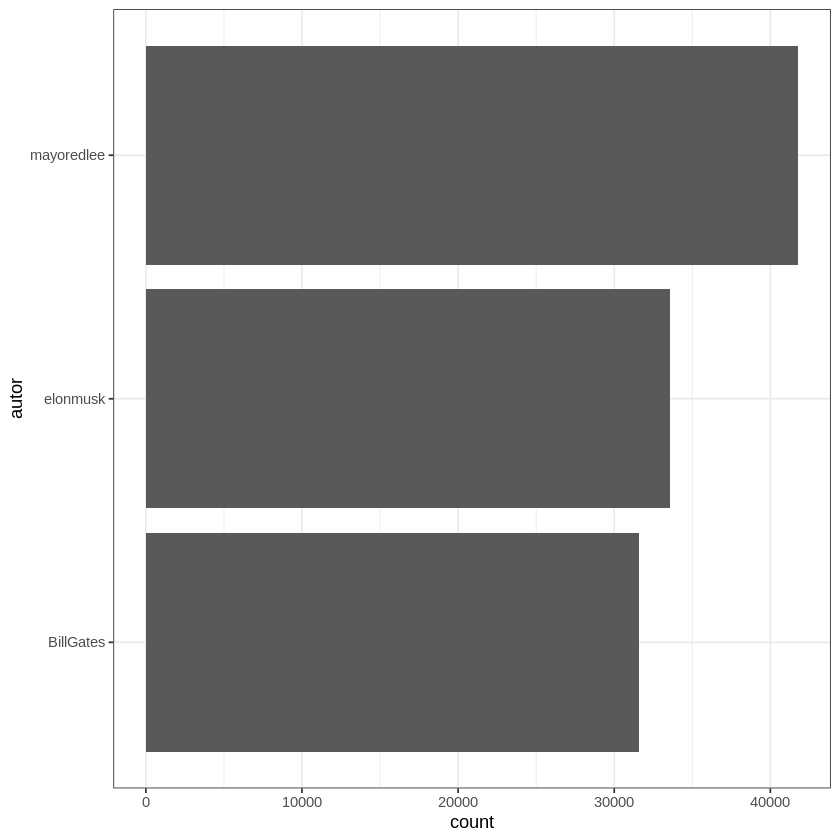

In [ ]:
tweets_tidy %>%  ggplot(aes(x = autor)) + geom_bar() + coord_flip() + theme_bw()

Palabras distintas utilizadas por cada usuario


In [ ]:
tweets_tidy %>% select(autor, token) %>% distinct() %>%  group_by(autor) %>%
            summarise(palabras_distintas = n())

autor,palabras_distintas
<chr>,<int>
BillGates,4510
elonmusk,6552
mayoredlee,5471


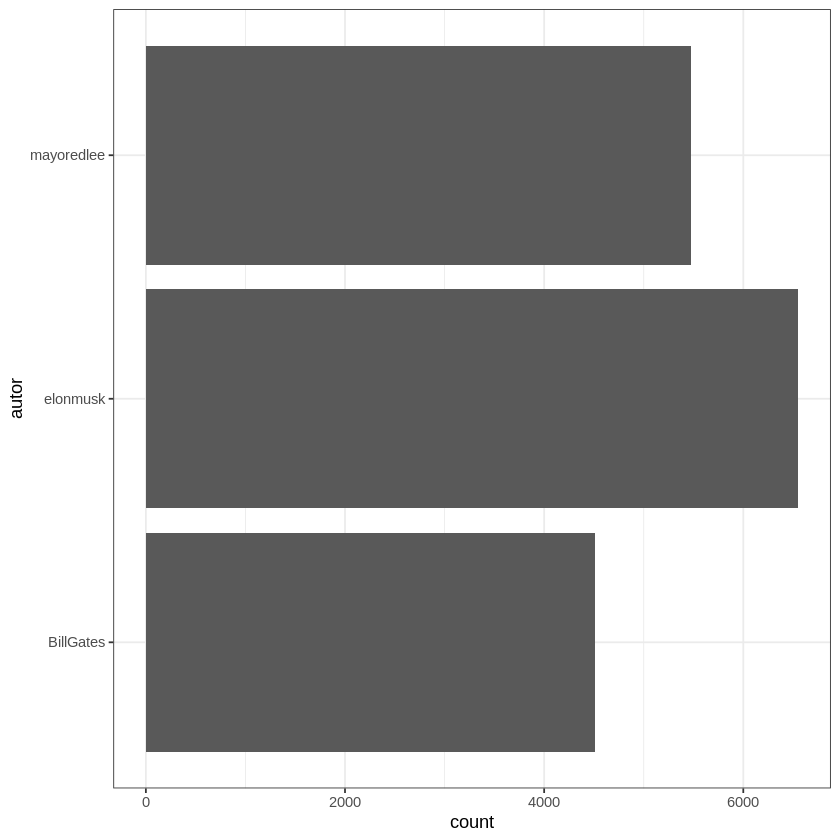

In [ ]:
tweets_tidy %>% select(autor, token) %>% distinct() %>%
            ggplot(aes(x = autor)) + geom_bar() + coord_flip() + theme_bw()

Aunque Elon Musk no es el que más palabras totales ha utilizado, bien porque ha publicado menos tweets o porque estos son más cortos, es el que más palabras distintas emplea.

# Longitud media de los tweets por usuario

In [ ]:
tweets_tidy %>% group_by(autor, tweet_id) %>% summarise(longitud = n()) %>%                       group_by(autor) %>% summarise(media_longitud = mean(longitud),
                                               sd_longitud = sd(longitud))

`summarise()` has grouped output by 'autor'. You can override using the
`.groups` argument.


autor,media_longitud,sd_longitud
<chr>,<dbl>,<dbl>
BillGates,15.17885,3.352719
elonmusk,12.63982,6.900113
mayoredlee,17.13987,3.453383


`summarise()` has grouped output by 'autor'. You can override using the
`.groups` argument.


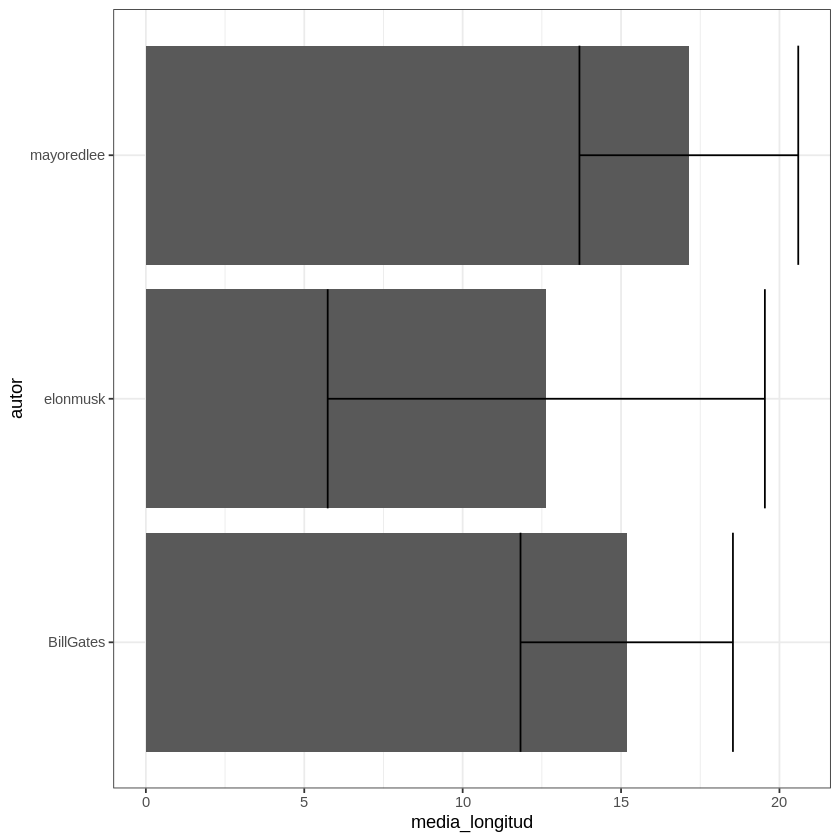

In [ ]:
tweets_tidy %>% group_by(autor, tweet_id) %>% summarise(longitud = n()) %>%                      group_by(autor) %>%
                summarise(media_longitud = mean(longitud),
                          sd_longitud = sd(longitud)) %>%
                ggplot(aes(x = autor, y = media_longitud)) +
                geom_col() +
                geom_errorbar(aes(ymin = media_longitud - sd_longitud,
                                  ymax = media_longitud + sd_longitud)) +
                coord_flip() + theme_bw()

El tipo de tweet de Bill Gates y Mayor Ed Lee es similar en cuanto a longitud media y desviación. Elon Musk alterna más entre tweets cortos y largos, siendo su media inferior a la de los otros dos.